# Self Organized Maps (SOMs)

## Import Libraries

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import numpy as np
import pandas as pd

# MiniSOM
from minisom import MiniSom

# XPySOM
from xpysom import XPySom

# SimpSOM, https://simpsom.readthedocs.io
import simpsom as sps
# from simpsom.plots import scatter_on_map

# Astropy
from astropy.table import Table

In [6]:
from psutil import *
# This code will return the number of CPU
print("Number of CPU: ", cpu_count())
# This code will return the CPU info
!cat /proc/cpuinfo

Number of CPU:  64
processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 23
model		: 8
model name	: AMD Ryzen Threadripper 2990WX 32-Core Processor
stepping	: 2
microcode	: 0x800820d
cpu MHz		: 2200.000
cache size	: 512 KB
physical id	: 0
siblings	: 64
core id		: 0
cpu cores	: 32
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid amd_dcm aperfmperf rapl pni pclmulqdq monitor ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand lahf_lm cmp_legacy svm extapic cr8_legacy abm sse4a misalignsse 3dnowprefetch osvw skinit wdt tce topoext perfctr_core perfctr_nb bpext perfctr_llc mwaitx cpb hw_pstate ssbd ibpb vmmcall fsgsbase bmi1 avx2 smep bmi2 rdseed adx smap clflushopt sha_ni xsaveopt xsavec xgetbv1 xsaves clzero irperf xsaveerptr 

## Import catalog

In [7]:
emu_matched_catalog_path = '/data/mfonseca/cross_match/EMU_0102-32/EMU_0101-32_DES_VIKING_CATWISE/EMU_0102-32_DES_VIKING_CATWISE.fits'
emu_matched_catalog = Table.read(emu_matched_catalog_path)
emu_matched_catalog = emu_matched_catalog.to_pandas()

In [8]:
emu_matched_catalog.describe()

,EMU_n_components,EMU_ra_deg_cont,EMU_dec_deg_cont,EMU_freq,EMU_maj_axis,EMU_min_axis,EMU_pos_ang,EMU_flux_int,EMU_flux_int_err,EMU_flux_peak,...,bias_VKG_jPetroMag,bias_VKG_yPetroMag,bias_VKG_ksPetroMag,bias_VKG_hPetroMag,bias_CAT_w1mpro,bias_CAT_w2mpro,p_single,p_any,p_i,match_flag
count,244803.0,244803.000000,244803.000000,244803.0,244803.000000,244803.000000,244803.000000,244803.000000,244803.0,244803.000000,...,244803.000000,244803.000000,244803.000000,244803.000000,244803.000000,244803.000000,244803.000000,244803.000000,2.448030e+05,244803.000000
mean,1.0,15.490508,-32.388351,943.5,10.636465,8.797066,95.558945,1.507697,0.0,1.383931,...,1.279762,1.297439,1.251702,1.215204,1.970878,2.315025,0.732029,0.889013,7.338146e-02,0.120284
std,0.0,1.877682,1.318861,0.0,2.844254,1.843961,48.920898,18.256750,0.0,15.560542,...,1.200666,1.226873,1.170662,1.048316,1.749330,2.140046,0.411443,0.258944,2.231009e-01,0.386738
min,1.0,11.862466,-35.154328,943.5,5.860000,4.310000,0.000000,0.036000,0.0,0.122000,...,0.404938,0.077019,0.270735,0.199832,0.165488,0.158431,0.000000,0.000000,0.000000e+00,0.000000
25%,1.0,13.957141,-33.483869,943.5,8.910000,7.320000,54.939999,0.114000,0.0,0.215000,...,0.594158,0.597044,0.700703,0.711125,1.000000,1.000000,0.395740,0.985841,1.194336e-11,0.000000
50%,1.0,15.490846,-32.370755,943.5,10.310000,8.560000,100.580002,0.197000,0.0,0.297000,...,0.594158,0.597044,0.700703,0.711125,1.000000,1.000000,0.997548,0.999995,1.292177e-06,0.000000
75%,1.0,17.044631,-31.245348,943.5,11.710000,10.190000,136.320007,0.452000,0.0,0.526000,...,1.624339,1.539979,1.230134,1.235064,2.583757,3.652712,0.999997,1.000000,1.560830e-03,0.000000
max,1.0,19.021128,-29.955183,943.5,75.919998,47.730000,179.990005,1606.759033,0.0,1410.647949,...,4.832622,4.441969,5.385254,4.417378,6.838447,7.803085,1.000000,1.000000,1.000000e+00,2.000000


In [9]:
# Here we filter the NWAY catalog to keep only the best objects

# From NWAY
# Filter the catalog based on the match_flag and p_i, p_any values
match_mask = (emu_matched_catalog['match_flag'] == 1) & (emu_matched_catalog['p_i'] >= 0.1) & (emu_matched_catalog['p_any'] >=0.84)

# Recomendadion from https://www.eso.org/rm/api/v1/public/releaseDescriptions/135, page 7
vikings_match = (emu_matched_catalog['VKG_zppErrBits']<255) & (emu_matched_catalog['VKG_yppErrBits']<255) & (emu_matched_catalog['VKG_ksErrBits']<255) & (emu_matched_catalog['VKG_jErrBits']<255) & (emu_matched_catalog['VKG_hErrBits']<255)

catalog_filtered = emu_matched_catalog[match_mask & vikings_match]
print(len(catalog_filtered))


# Filter the catalog to keep only the magnitude columns
magnitude_columns = ['DES_mag_auto_g_dered', 'DES_mag_auto_r_dered', 'DES_mag_auto_i_dered', 'DES_mag_auto_z_dered',
                       'VKG_zPetroMag', 'VKG_jPetroMag', 'VKG_yPetroMag', 'VKG_ksPetroMag', 'VKG_hPetroMag', 'CAT_w1mpro', 'CAT_w2mpro']
catalog_filtered_magnitude = catalog_filtered[magnitude_columns]

# Should be the same lenght as the filtered catalog
print(len(catalog_filtered_magnitude))

10948
10948


Define the topology of the SOM, follow indications from "Self-Organizing Maps and Their Applications to Data Analysis" R. Ponmalai, C. Kamath

In [22]:
# SOM topology (lattice size)

# Number of sources in our dataframe
inputdata_size = len(catalog_filtered_magnitude)

# From Kohonen, the optimal ratio of height to width of the lattice
# is equal to the ratio of the two largest eigenvalue of the autocorrelation matrix
cov_std = catalog_filtered_magnitude.cov()
eigen_values = np.linalg.eigvals(cov_std.values)
eigen_values_sorted = np.sort(eigen_values)[::-1]
ratio_eigenvalues = eigen_values_sorted[0] / eigen_values_sorted[1]

# From Kohonen, the number of nodes if 5*sqrt(n), where n is the number of data points
som_dim = int(np.sqrt(inputdata_size) * 5)

# The number of nodes in the x and y direction
som_x = int(np.sqrt(som_dim * ratio_eigenvalues))
som_y = int(som_x / ratio_eigenvalues)

# Print the results
print('Dimension of the SOM: ', som_dim)
print('Square SOM map size ', np.round(np.sqrt(som_dim)))
print('SOM map size using eigenvalues: ', som_x, 'x', som_y)

Dimension of the SOM:  523
Square SOM map size  23.0
SOM map size using eigenvalues:  40 x 12


In [11]:
# Definine the  subset of the catalog to use
data_fraction2use = 1
data = catalog_filtered_magnitude.sample(frac=data_fraction2use)

# Normalize the data
data.to_numpy()
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values 

In [31]:
help(sps.SOMNet.train)

Help on function train in module simpsom.network:

train(self, train_algo='batch', epochs=-1, start_learning_rate=0.01, early_stop=None, early_stop_patience=3, early_stop_tolerance=0.0001, batch_size=-1)
    Train the SOM.

    Args:
        train_algo (str): training algorithm, choose between 'online' or 'batch'
            (default 'online'). Beware that the online algorithm will run one datapoint
            per epoch, while the batch algorithm runs all points at one for each epoch.
        epochs (int): Number of training iterations. If not selected (or -1)
            automatically set epochs as 10 times the number of datapoints.
        start_learning_rate (float): Initial learning rate, used only in online
            learning.
        early_stop (str): Early stopping method, for now only 'mapdiff' (checks if the
            weights of nodes don't change) and 'bmudiff' (checks if the assigned bmu to each sample
            don't change) are available. If None, don't use early st

Periodic Boundary Conditions active.
The weights will be initialized randomly.
The map will be trained with the batch algorithm.
Training SOM... done!


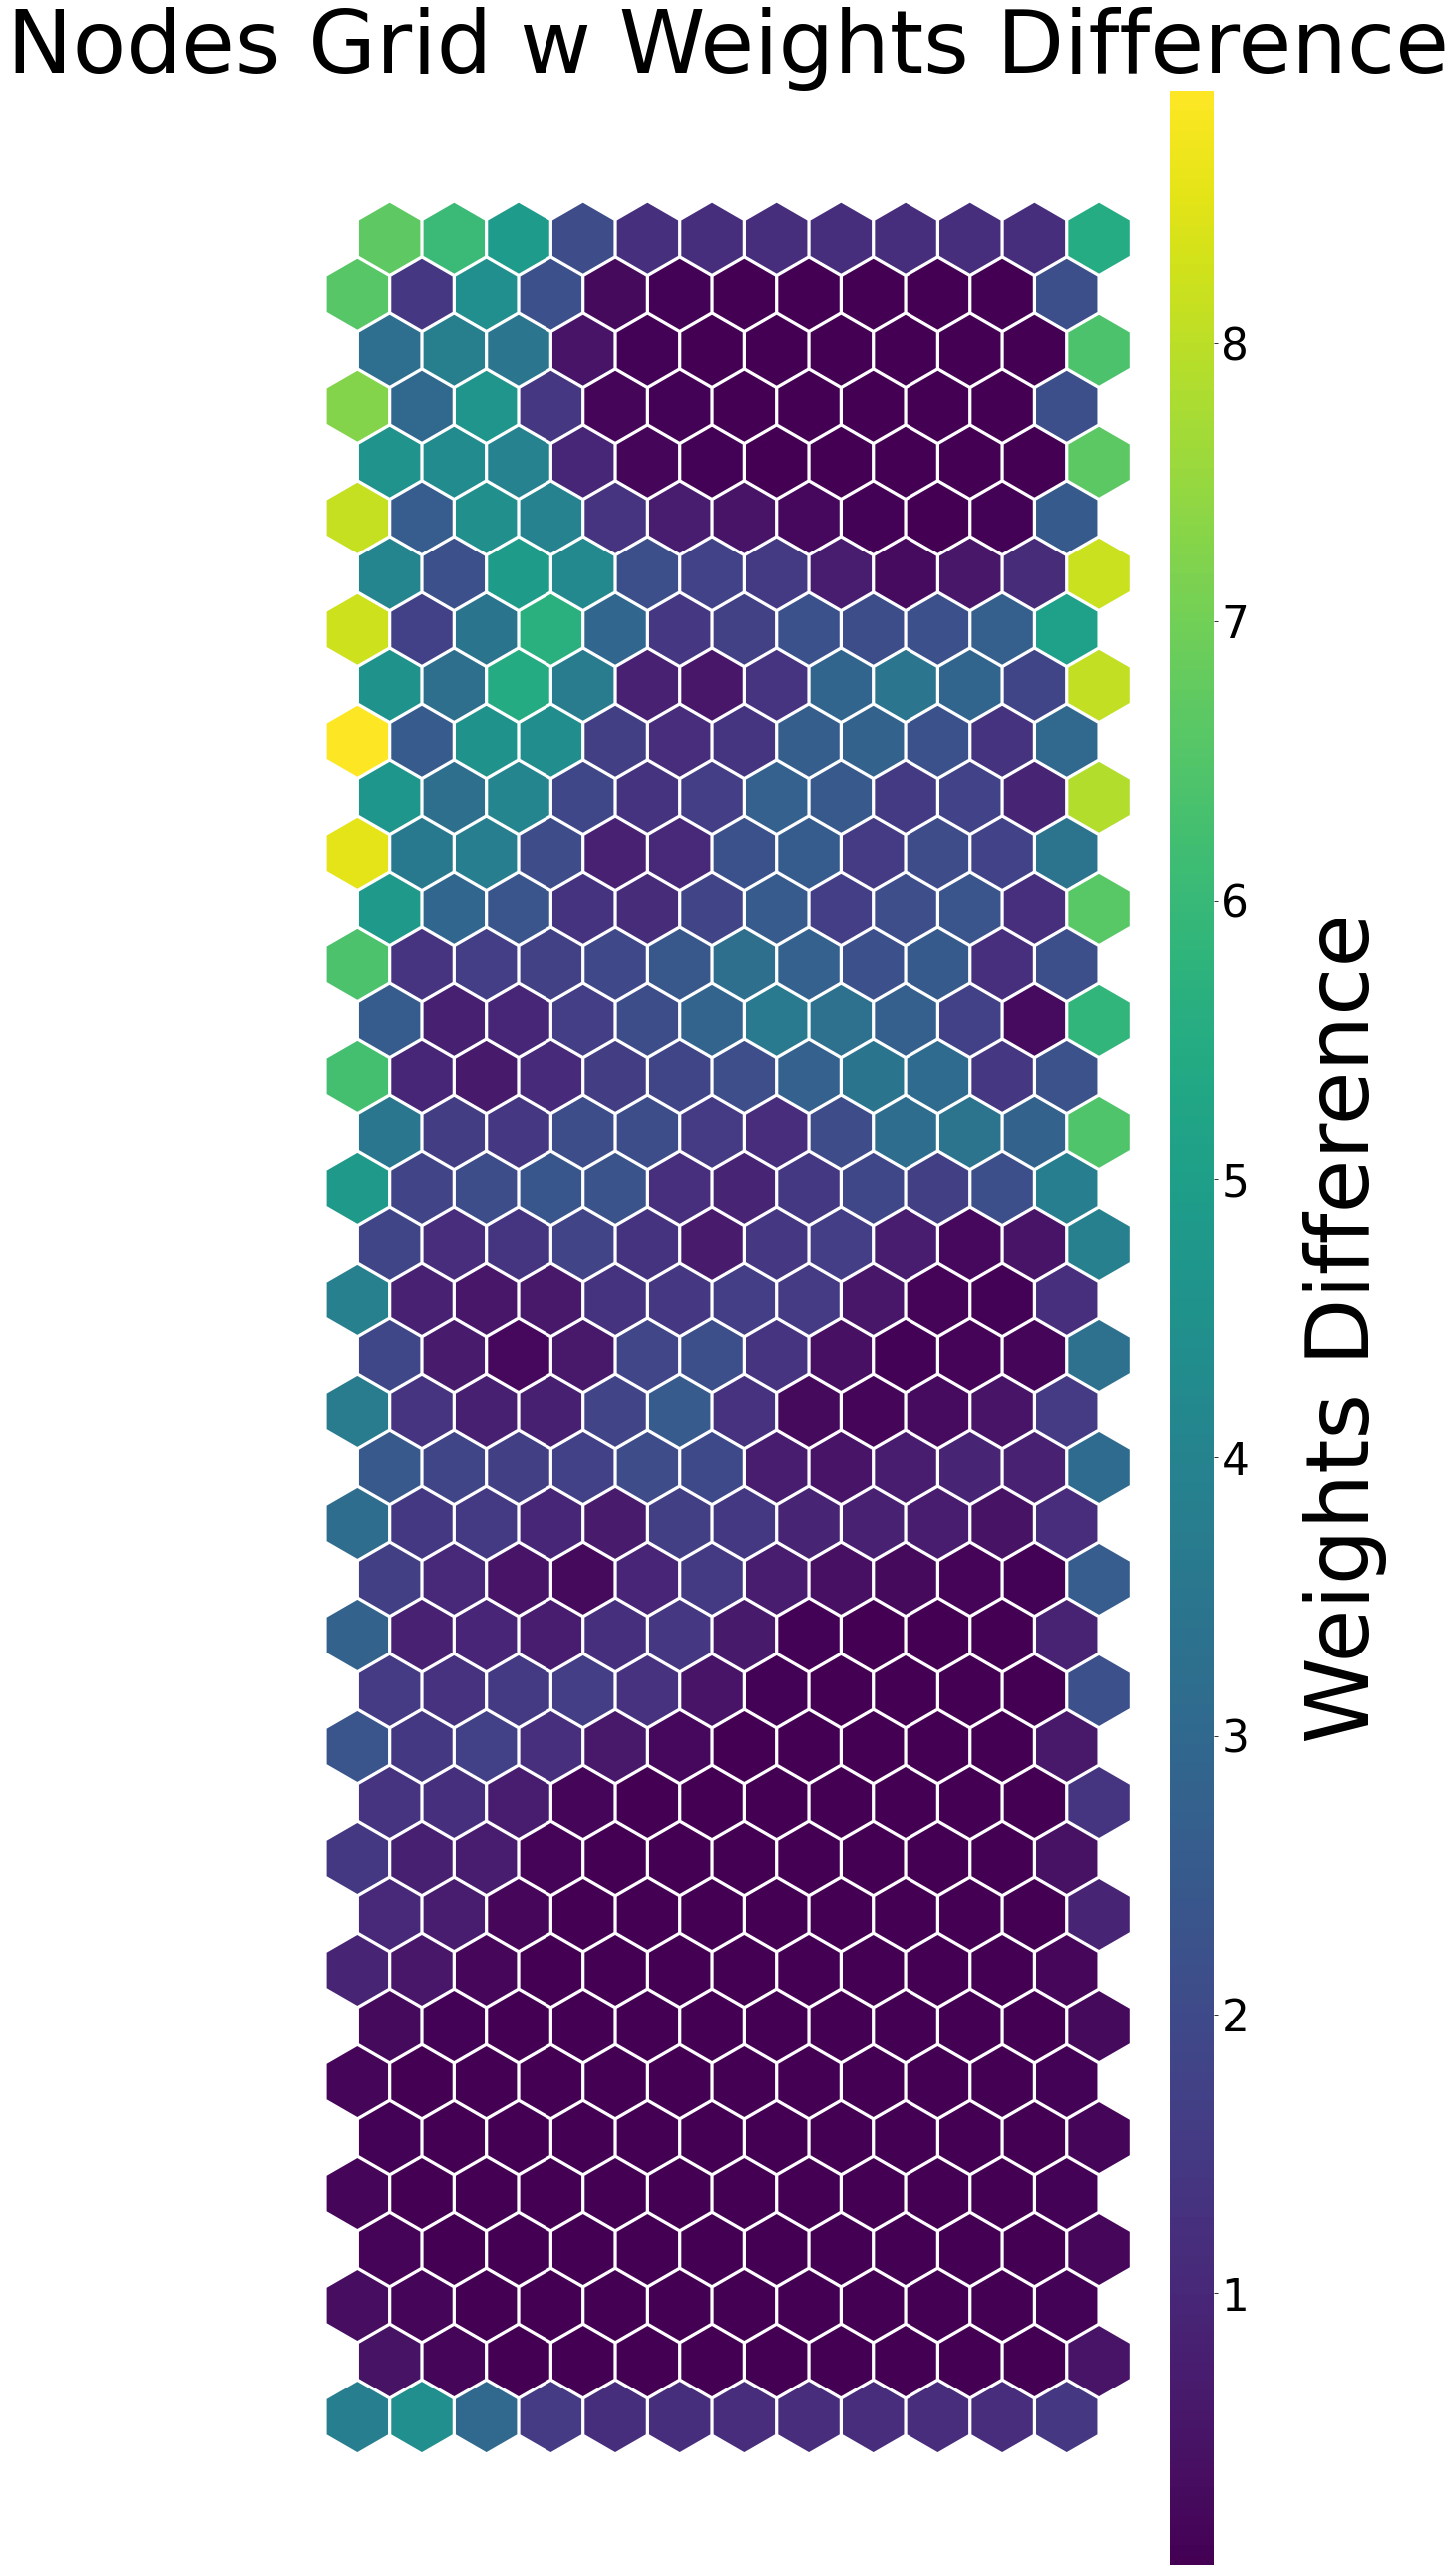

<Figure size 640x480 with 0 Axes>

In [ ]:
# List of avaliable metrics https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html

som = sps.SOMNet(
    som_x,
    som_y,
    data,
    load_file = None,
    metric= 'euclidean',
    # metrick_kwds={},
    init = 'random' , # 'random' or 'pca'
    PBC = True,
    GPU = True,
    random_seed = 42
)

som.train(
    train_algo = 'batch', 
    epochs = -1 ,
    start_learning_rate = 0.1 ,
    early_stop = None ,
    early_stop_patience = 10 ,
    early_stop_tolerance = 0.01 ,
    batch_size = -1
)

som.diff_graph(
    show = True ,
    print_out = False ,
    returns = False ,
    out_path = '/data/mfonseca/soms/EMU_0102-32/'
)

In [29]:
clusters = som.cluster(data, clus_type='qthresh', show=True)
som.project(data, colnum=0, show=True)

KeyboardInterrupt: 

### XPySom

In [ ]:
data_min = catalog_matrix.min(axis=0)
data_max = catalog_matrix.max(axis=0)
normalized_data = (catalog_matrix - data_min) / (data_max - data_min)

In [ ]:
galaxy_names = catalog_df['EMU_island_name'].values

# data normalization
data = (catalog_df_filtered - np.mean(catalog_df_filtered, axis=0)) / np.std(catalog_df_filtered, axis=0)
data = data.values

# Initialization and training
som_shape = (20, 20)
som = XPySom(20, 20, data)


TypeError: only integer scalar arrays can be converted to a scalar index

## MiniSom

### Example

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'], usecols=[0, 5], 
                   sep='\t+', engine='python')
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values


# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

[[ 1.42097769e-01 -9.86151745e-01]
 [ 1.11880257e-02 -1.78816620e+00]
 [-1.92066576e-01 -6.67479334e-01]
 [-3.47091272e-01 -9.60817955e-01]
 [ 4.45257175e-01 -1.56349549e+00]
 [-1.61061637e-01 -8.25482182e-01]
 [-5.42668460e-02 -7.61353407e-02]
 [-2.54076455e-01 -6.66812655e-01]
 [ 6.14061844e-01 -1.10682059e+00]
 [ 5.48606973e-01 -1.15415477e+00]
 [ 1.42097769e-01  5.61876160e-01]
 [-2.81636401e-01 -1.32215780e+00]
 [-3.29866306e-01  1.90536133e-01]
 [-3.67761232e-01 -3.76140749e-01]
 [-3.81541205e-01 -5.12143200e-01]
 [-8.87167785e-02  3.23205191e-01]
 [-2.95416374e-01  1.02255113e+00]
 [ 2.90232479e-01 -1.40082589e+00]
 [-5.08218528e-02 -1.28882387e+00]
 [-7.32930516e-01  2.67870860e-01]
 [-2.36851488e-01 -4.18808184e-01]
 [-2.54076455e-01 -6.74812799e-01]
 [ 3.55687351e-01 -1.95676924e+00]
 [-9.53410084e-01 -1.52349476e+00]
 [ 5.59729379e-02 -1.27282358e+00]
 [ 4.62482141e-01 -1.86483425e+00]
 [-6.29580719e-01 -2.18137900e-01]
 [-7.26040530e-01 -7.97481677e-01]
 [-2.54076455e-01 -6

In [15]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

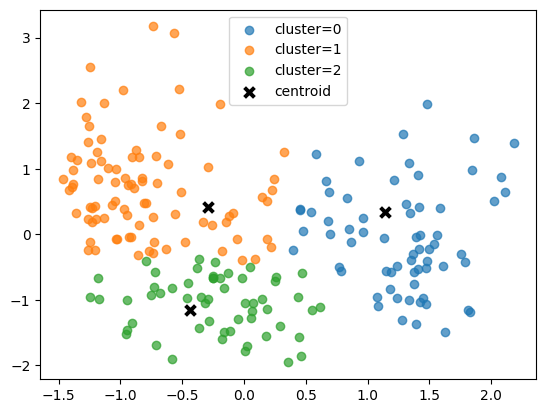

In [ ]:
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=4, linewidths=10, color='k', label='centroid')
plt.legend(loc='best')

### With our galaxy values

In [19]:
galaxy_names = catalog_df['EMU_island_name'].str.decode('utf-8').str.strip()

# Normalize the data
data = (catalog_df_filtered_matches_magnitude - np.mean(catalog_df_filtered_matches_magnitude, axis=0)) / np.std(catalog_df_filtered_matches_magnitude, axis=0)
data = data.values

In [50]:
som_shape = (10, 10)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.1,
              neighborhood_function='gaussian', random_seed=0)

som.train_batch(data, 100000, verbose=True)

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.20844634964872283


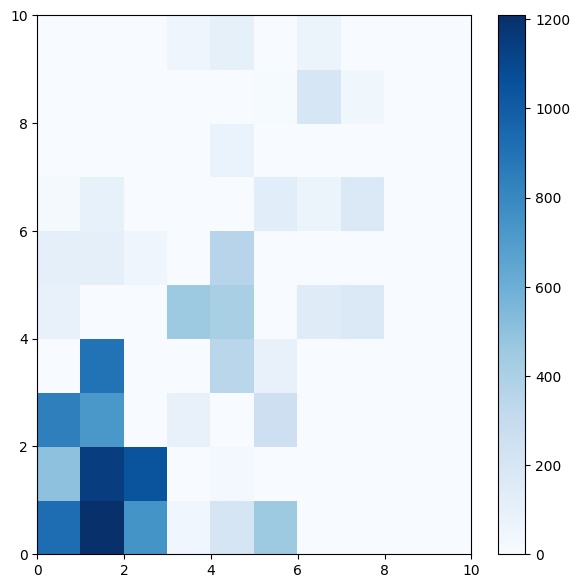

In [51]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

In [52]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

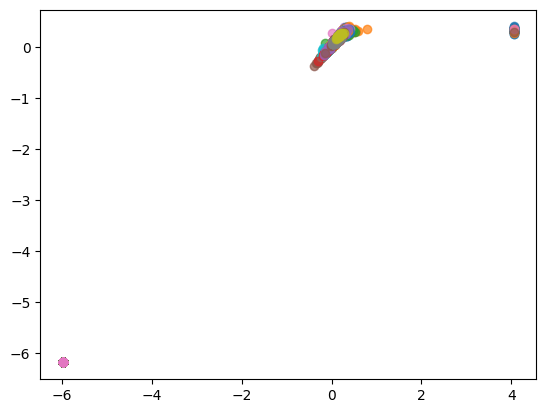

In [54]:
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plt.xlim(-.5,1)
# plt.ylim(-1,1)
